# Author: Sandesh Basnet

# EDA on Automobile Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [5]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
df['Recession'].unique()

array([1, 0], dtype=int64)

In [7]:
df.sample(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
379,4/30/2011,2011,Apr,0,96.73,1.0,21163.262,4675,4,58.582,0.290977,2.9,1981.3,Executivecar,Illinois
426,3/31/2015,2015,Mar,0,105.22,1.5,23755.179,1470,9,28.518,0.466407,1.6,3196.2,Executivecar,Illinois
254,1/31/1997,1997,Jan,0,94.26,0.5,18111.653,3935,4,35.090,-0.944885,1.7,854.4,Executivecar,New York
281,4/30/1999,1999,Apr,0,90.21,1.0,26082.293,4030,4,48.658,-0.306219,2.6,2275.8,Mediumfamilycar,New York
498,7/31/2021,2021,Jul,0,97.53,0.5,20621.909,1609,9,42.420,0.552852,2.6,824.8,Executivecar,California


How automobile sales fluctuate from year to year from pandas

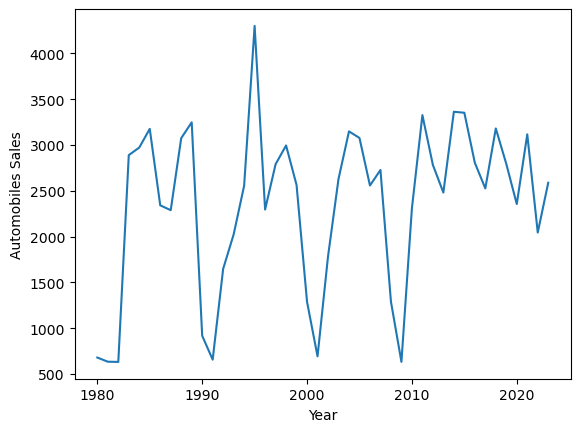

In [8]:
df_line= df.groupby(['Year'])['Automobile_Sales'].mean()
df_line.plot(x= df_line.index, y= df_line.values, kind= 'line')
#df_line.plot(kind= 'line')
plt.xlabel('Year')
plt.ylabel('Automobiles Sales')
plt.show()

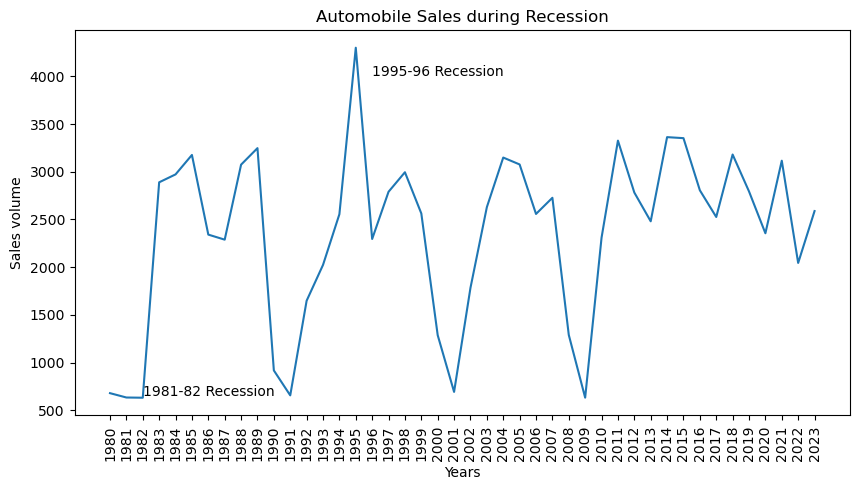

In [9]:
plt.figure(figsize=(10,5))
df_line = df.groupby(['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980, 2024)), rotation = 90)
plt.xlabel('Years')
plt.ylabel('Sales volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1996, 4000, '1995-96 Recession')
plt.show()

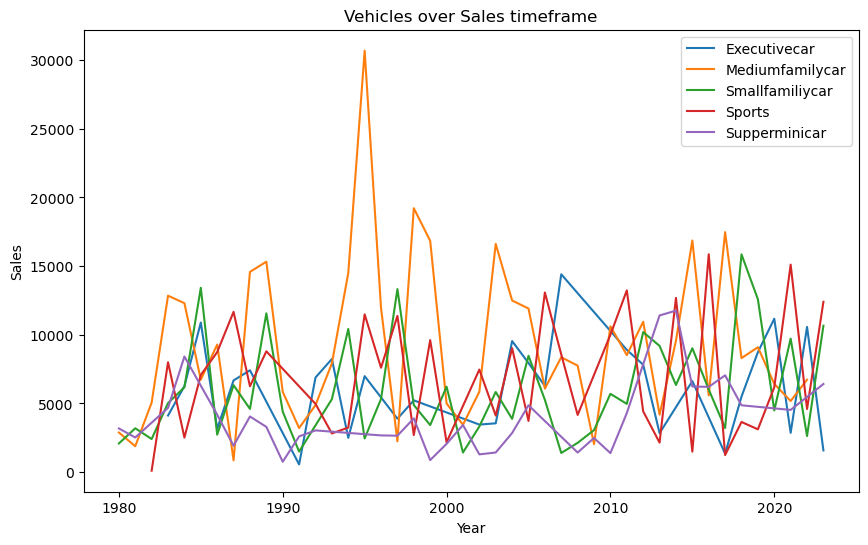

In [10]:
plt.figure(figsize= (10, 6))
line_plot= df.groupby(['Year','Vehicle_Type'], as_index= False)['Automobile_Sales'].sum()
line_plot.set_index('Year', inplace= True)
line_plot= line_plot.groupby(['Vehicle_Type'])['Automobile_Sales']
line_plot.plot(kind= 'line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Vehicles over Sales timeframe')
plt.legend()
plt.show()

Compare the sales trend per vehicle type for a recession period with a non-recession period from seaborn

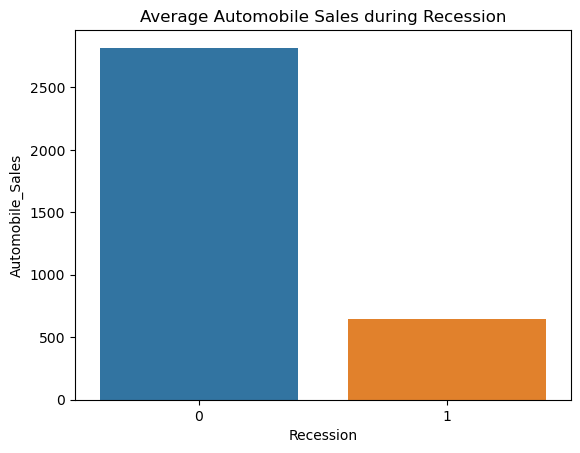

In [11]:
df_new = df.groupby('Recession')['Automobile_Sales'].mean().reset_index() 
sns.barplot(x= 'Recession', y= 'Automobile_Sales', data= df_new)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession')
plt.show()

Sales of different vehicle types during a recession and a non-recession period

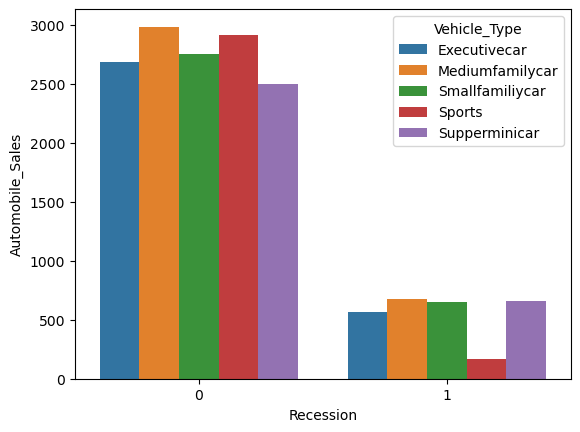

In [12]:
df_new= df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sns.barplot(x= 'Recession', y= 'Automobile_Sales', data= df_new, hue= 'Vehicle_Type')
plt.show()

Sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

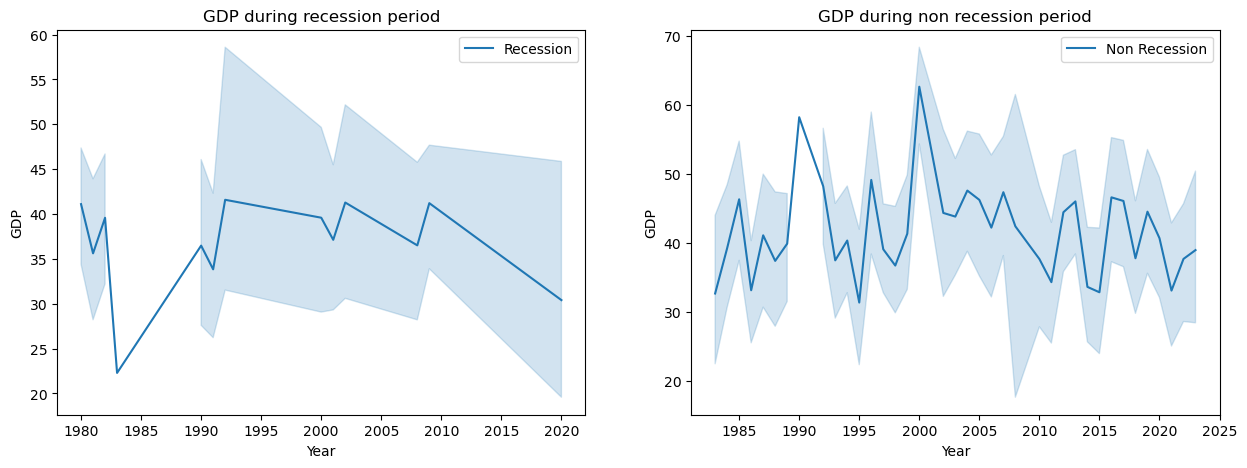

In [13]:
rec_data= df[df['Recession'] == 1]
non_rec_data= df[df['Recession'] == 0]

fig= plt.figure(figsize=(15,5))
ax0= fig.add_subplot(1, 2, 1)
ax1= fig.add_subplot(1, 2, 2)

sns.lineplot(data= rec_data, x= 'Year', y= 'GDP', ax= ax0, label= 'Recession')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP during recession period')

sns.lineplot(data= non_rec_data, x= 'Year', y= 'GDP', ax= ax1, label= 'Non Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP during non recession period')

plt.tight_layout
plt.show()

Bubble plot for displaying the impact of seasonality on Automobile Sales.

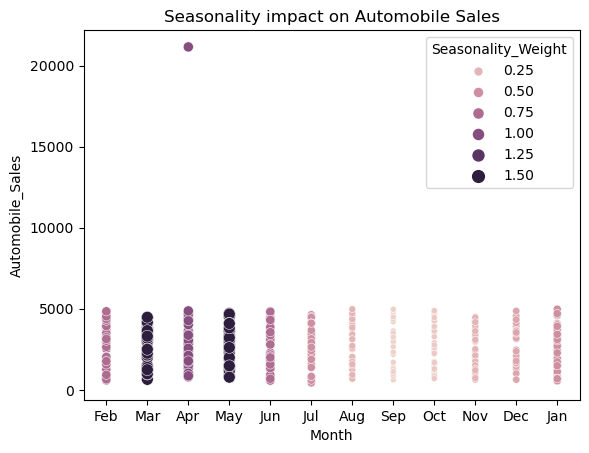

In [14]:
non_rec_data= df[df['Recession']== 0]
size= non_rec_data['Seasonality_Weight']

sns.scatterplot(data= non_rec_data, x= 'Month', y= 'Automobile_Sales', size= size, hue= 'Seasonality_Weight',)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

Scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions using Matplotlib.

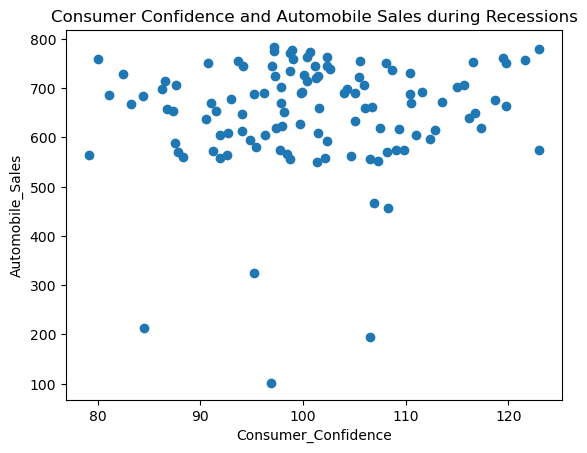

In [15]:
rec_data= df[df['Recession']== 1]
#plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.scatter(x ='Consumer_Confidence', y= 'Automobile_Sales', data= rec_data)
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

Average vehicle price relate to the sales volume during recessions

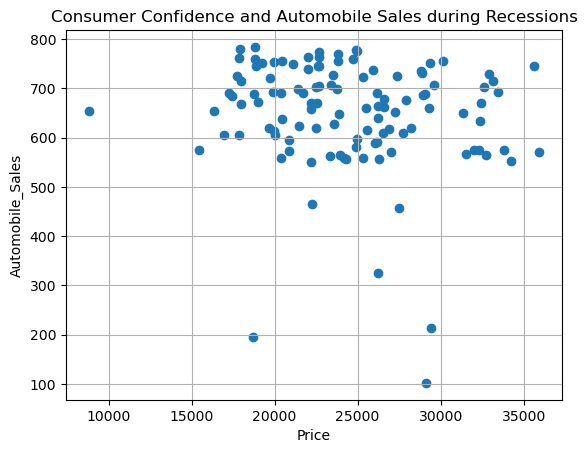

In [16]:
rec_data= df[df['Recession']== 1]
#plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.scatter(x ='Price', y= 'Automobile_Sales', data= rec_data,)
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.grid()
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

Pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

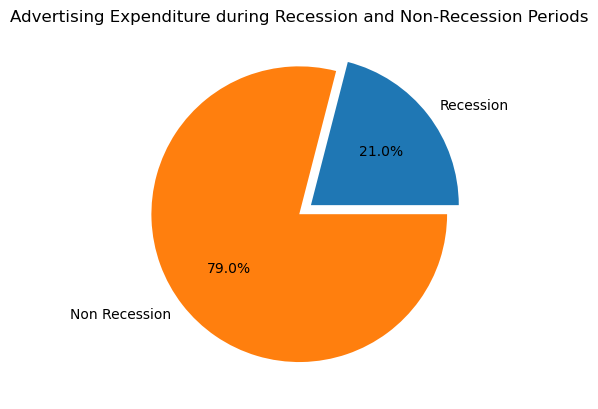

In [17]:
rec_data= df[df['Recession'] == 1]
non_rec_data= df[df['Recession'] == 0]

rec_datum= rec_data['Advertising_Expenditure'].sum()
rec_datu= non_rec_data['Advertising_Expenditure'].sum()

labels=['Recession', 'Non Recession']
plt.pie(x= [rec_datum, rec_datu], autopct= '%1.1f%%', labels= labels, explode= [0.1,0])
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

Pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

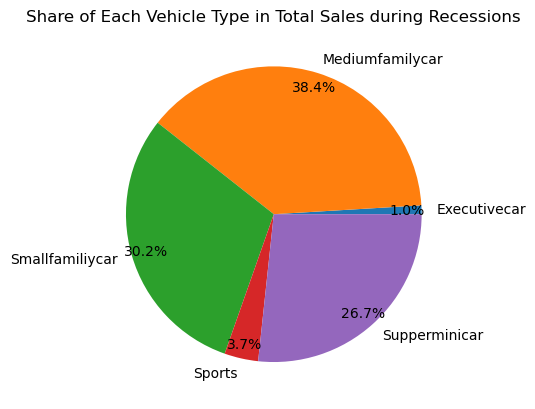

In [18]:
rec_data= df[df['Recession'] == 1]
df_new = rec_data.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()

labels= df_new.index
size= df_new.values
plt.pie(size, autopct= '%1.1f%%', labels= labels, pctdistance= 0.9)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

Countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

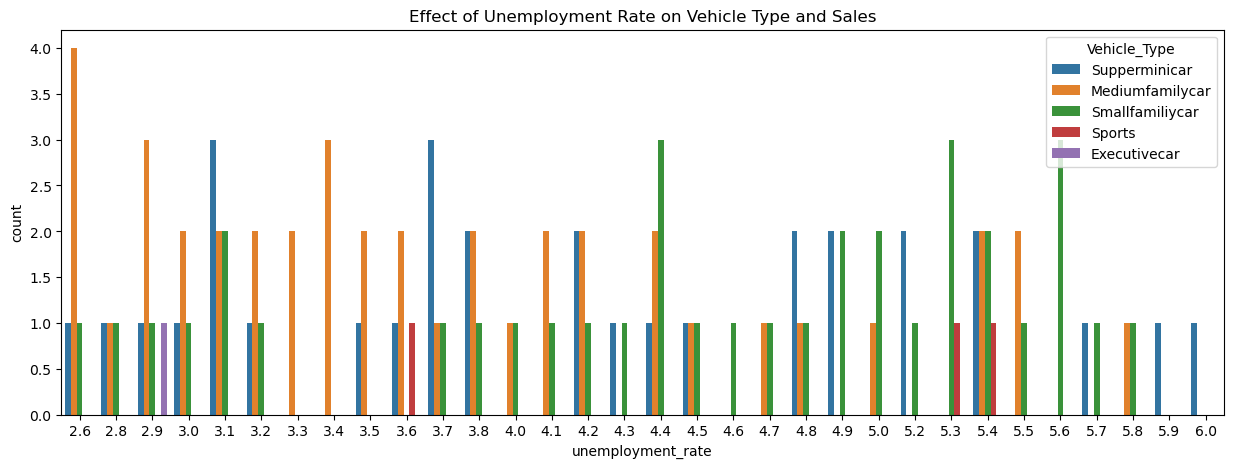

In [19]:
rec_data= df[df['Recession'] == 1]
plt.figure(figsize=(15, 5))
sns.countplot(data= rec_data, x= 'unemployment_rate', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()